In [1]:
import pandas as pd
from pathlib import Path
from lagom.utils import pickle_load
from lagom.vis import CurvePlot
import matplotlib.pyplot as plt


def load_loggings(log_folder, ID, f):
    p = Path(log_folder)/str(ID)
    out = []
    for seed_folder in p.iterdir():
        if seed_folder.is_dir() and (seed_folder/f).exists():
            out.append(pickle_load(seed_folder/f))
    return out


def get_items(loggings, key):
    out = []
    for logging in loggings:
        items = [x[key][0] for x in logging]
        out.append(items)
    return out


def get_xy(loggings, x_key, y_key):
    x = get_items(loggings, x_key)
    y = get_items(loggings, y_key)
    return x, y

/home/zuo/Code/tmp/lagom/lagom/vis/__init__.py:10: UserWarning: ImageViewer failed to import due to pyglet. 
  warnings.warn('ImageViewer failed to import due to pyglet. ')


In [2]:
log_folder = Path(f'logs/default/')
d = pickle_load(log_folder/'configs.pkl')
configs = pd.DataFrame(d, columns=d[0].keys())
configs

,ID,cuda,env.id,env.standardize,env.time_aware_obs,network.recurrent,network.hidden_sizes,network.independent_V,algo.lr,algo.lr_V,...,agent.constant_std,agent.std_state_dependent,agent.init_std,train.timestep,train.N,train.ratio_T,eval.independent,eval.N,log.interval,log.dir
0,0,True,HalfCheetah-v2,True,False,False,"[64, 64]",False,0.0007,0.001,...,None,False,0.5,1000000.0,1,1.0,False,10,10,logs/default


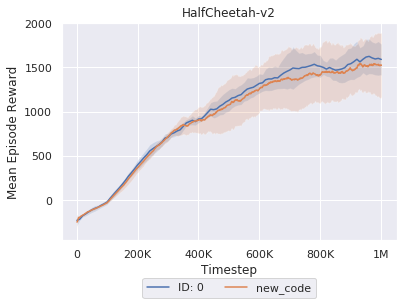

In [60]:
plot = CurvePlot()

x_key = 'accumulated_trained_timesteps'
xlabel = 'Timestep'
y_key = 'running_mean_return'
ylabel = 'Mean Episode Reward'

ID = 0
hyp = 'ID'
loggings = load_loggings(log_folder, ID, 'train_logs.pkl')
x, y = get_xy(loggings, x_key, y_key)
plot.add(f'{hyp}: {configs[hyp][ID]}' , y, xvalues=x)


loggings = load_loggings('logs/default_/', 0, 'train_logs.pkl')
x, y = get_xy(loggings, x_key, y_key)
plot.add('new_code', y, xvalues=x)



ax = plot(title=configs['env.id'][ID], 
          xlabel=xlabel, 
          ylabel=ylabel, 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[1.0], 
          alphas=[0.2])
legend = ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)
#ax.figure.savefig(log_folder/'result.png', bbox_extra_artists=(legend,), bbox_inches='tight')

In [5]:
log_folder = Path(f'logs/default__/')
d = pickle_load(log_folder/'configs.pkl')
configs = pd.DataFrame(d, columns=d[0].keys())
configs

,ID,cuda,log.dir,log.interval,env.standardize,env.time_aware_obs,nn.recurrent,nn.sizes,nn.independent_V,agent.lr,...,agent.terminal_value_coef,env.clip_action,agent.std0,agent.std_style,agent.std_range,agent.beta,train.timestep,train.N,train.ratio_T,env.id
0,0,True,logs/default__,10,True,False,False,"[64, 64]",False,0.0007,...,0.1,True,0.5,exp,None,None,1000000.0,1,1.0,HalfCheetah-v2
1,1,True,logs/default__,10,True,False,False,"[64, 64]",False,0.0007,...,0.1,True,0.5,exp,None,None,1000000.0,1,1.0,Hopper-v2


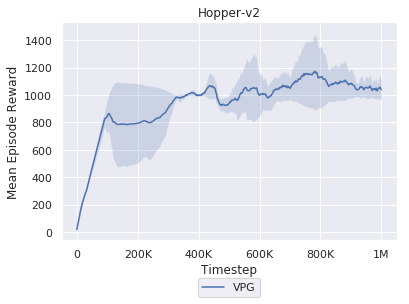

In [6]:
plot = CurvePlot()

x_key = 'accumulated_trained_timesteps'
xlabel = 'Timestep'
y_key = 'running_mean_return'
ylabel = 'Mean Episode Reward'

ID = 1
hyp = 'ID'
loggings = load_loggings(log_folder, ID, 'train_logs.pkl')
x, y = get_xy(loggings, x_key, y_key)
plot.add('VPG', y, xvalues=x)

ax = plot(title=configs['env.id'][ID], 
          xlabel=xlabel, 
          ylabel=ylabel, 
          num_tick=6, 
          xscale_magnitude=None, 
          scales=[1.0], 
          alphas=[0.2])
legend = ax.legend(loc='upper center', bbox_to_anchor=[0.5, -0.15], ncol=2)
#ax.figure.savefig(log_folder/'result.png', bbox_extra_artists=(legend,), bbox_inches='tight')